# Imports

In [1]:
from dataProcessing import getTextsInDateRange, getPairs, getFullWordset, buildTokenizer
import numpy as np
from keras.models import Model
from keras.layers import Input, Dense

# Conda env checking
From article here:
https://towardsdatascience.com/get-your-conda-environment-to-show-in-jupyter-notebooks-the-easy-way-17010b76e874

If conda env is being used correctly, the environment variable below should be `base`.

In [2]:
import os
print(os.environ['CONDA_DEFAULT_ENV'])

base


# Constants

In [3]:
CHANNEL_MAPPINGS = {
    "Daily Wire": "UCroKPvbmaQKGK5tjtQsvaDw",
    "Ben Shapiro": "UCnQC_G5Xsjhp9fEJKuIcrSw",
    "Daily Wire Plus": "UCaeO5vkdj5xOQHp4UmIN6dw",
#     "Matt Walsh": "UCO01ytfzgXYy4glnPJm4PPQ",
#     "Michael Knowls": "UCr4kgAUTFkGIwlWSodg43QA",
#     "Candas Owens": "UCkY4fdKOFk3Kiq7g5LLKYLw"
}

# Parameters

In [4]:
# channels = ['Ben Shapiro']
channels = list(CHANNEL_MAPPINGS.keys())
start = 2010
stop = 2023

# Get Texts

In [5]:
channelIds = [CHANNEL_MAPPINGS[c] for c in channels]
texts = getTextsInDateRange(channelIds, start, stop)
channelstext = "\n  - ".join(channels)
print([t[:30] for t in texts[:10]])
print()
print(f'Found {len(texts)} videos for channels: \n  - {channelstext}')

['[Music] we have nine days left', 'will Rising inflation and a de', 'candidates Spar on the debate ', 'and then the free state of Flo', 'with three weeks to go into el', 'election day is just one month', 'with only two days remaining b', '[Music] the counting continues', '[Music] the Walt Disney Compan', "[Music] Facebook's parent comp"]

Found 1210 videos for channels: 
  - Daily Wire
  - Ben Shapiro
  - Daily Wire Plus


# Build Pairs

In [6]:
pairs = getPairs(texts, window=2)
print(pairs[:10])

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1210/1210 [00:03<00:00, 313.97it/s]

[('[Music]', 'we'), ('[Music]', 'have'), ('we', 'have'), ('we', '[Music]'), ('we', 'nine'), ('have', 'nine'), ('have', 'we'), ('have', 'days'), ('have', '[Music]'), ('nine', 'days')]


# Get wordset and build tokenizer

In [7]:
wordset = getFullWordset()
print(list(wordset)[:20])
word2idx, idx2word = buildTokenizer(wordset)

['', 'Kaitlin', 'dustups', 'foosball', 'McKenney', 'designate', 'over-educated', 'Kwame', 'holt', "bourne's", 'subtract', 'barnesandnoble.com', 'Judea', 'tiered', 'amana', 'sarah', 'recedes', 'Hilary', 'which', '20:17']


# Convert Pairs to ints

In [36]:
def pairToInts(pair, mapping):
    a, b = pair
    return (mapping[a], mapping[b])

intpairs = [pairToInts(p, word2idx) for p in pairs]
print(intpairs[:20])
print(f'Total pairs: {len(intpairs)}')

[(45565, 53872), (45565, 18838), (53872, 18838), (53872, 45565), (53872, 40394), (18838, 40394), (18838, 53872), (18838, 43834), (18838, 45565), (40394, 43834), (40394, 18838), (40394, 56283), (40394, 53872), (43834, 56283), (43834, 40394), (43834, 53872), (43834, 18838), (56283, 53872), (56283, 43834), (56283, 18838)]
Total pairs: 24448520


# Convert ints to one-hot vectors

In [37]:
ins = [p[0] for p in intpairs]
outs = [p[1] for p in intpairs]
print(min(ins), max(ins))
print(min(outs), max(outs))
print(len(wordset))

0 62138
0 62138
62139


# Build X, Y matrices

In [38]:
import time
from tqdm import tqdm
n = np.array(intpairs)
a = n[:, 0]
b = n[:, 1]
print(n.shape)
print(a.shape)
print(b.shape)

(24448520, 2)
(24448520,)
(24448520,)


In [ ]:
print(len(intpairs))
print(len(a), len(b))
start = time.time()

X2 = np.zeros((a.size, a.max()+1))
X2[np.arange(a.size), a] = 1
Y2 = np.zeros((b.size, b.max()+1))
Y2[np.arange(b.size), b] = 1
    
print(f'{time.time() - start} seconds')
print(X.shape)
print(Y.shape)

24448520
24448520 24448520


# Build and compile NNet

In [ ]:
EMBED_SIZE = 64

In [ ]:
inp = Input(shape=(X.shape[1],))
x = Dense(units=EMBED_SIZE, activation='linear')(inp)
x = Dense(units=Y.shape[1], activation='softmax')(x)
model = Model(inputs=inp, outputs=x)
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [ ]:
print(model.summary())

# Train NNet

In [13]:
hist = model.fit(
    x=X,
    y=Y,
    batch_size=256,
    epochs=150
)

Epoch 1/150


2022-12-02 22:46:23.278583: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-02 22:46:23.433962: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - 0s 6ms/step - loss: 6.5142
Epoch 2/150
33/33 [==============================] - 0s 6ms/step - loss: 6.4164
Epoch 3/150
33/33 [==============================] - 0s 6ms/step - loss: 6.1635
Epoch 4/150
33/33 [==============================] - 0s 6ms/step - loss: 5.8130
Epoch 5/150
33/33 [==============================] - 0s 6ms/step - loss: 5.6244
Epoch 6/150
33/33 [==============================] - 0s 5ms/step - loss: 5.5812
Epoch 7/150
33/33 [==============================] - 0s 5ms/step - loss: 5.5582
Epoch 8/150
33/33 [==============================] - 0s 6ms/step - loss: 5.5377
Epoch 9/150
33/33 [==============================] - 0s 6ms/step - loss: 5.5186
Epoch 10/150
33/33 [==============================] - 0s 6ms/step - loss: 5.4984
Epoch 11/150
33/33 [==============================] - 0s 5ms/step - loss: 5.4762
Epoch 12/150
33/33 [==============================] - 0s 5ms/step - loss: 5.4518
Epoch 13/150
33/33 [=============================

# Performance Stats

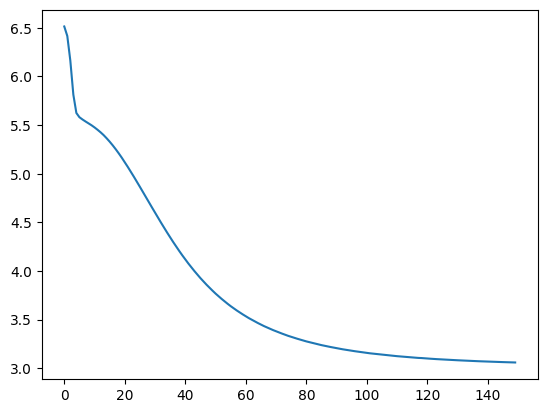

In [14]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.show()

# Build word -> vector mapping

In [15]:
weights = model.get_weights()[0]
print(weights)
print(weights.shape)
word2vec = {}
for word in wordset:
    vec = weights[word2idx[word]]
    word2vec[word] = vec

[[-0.14571263  0.2952971   0.2380549  ... -0.93145853  0.6457433
  -0.9606416 ]
 [ 0.0713506  -0.07083847  0.23664223 ...  0.21082838  0.62614137
  -0.3187223 ]
 [ 0.33257437  0.0354412  -1.0323787  ...  0.67945427  0.33325532
  -0.24414983]
 ...
 [-0.04559973 -0.38417155 -0.74726593 ...  0.53569937  0.5298656
  -1.1608443 ]
 [ 0.3899675  -0.5143765  -0.2599429  ... -0.9472235   0.4225814
  -1.0331986 ]
 [-0.10514595 -0.26671892 -0.1189878  ... -0.76365733  0.74081767
  -0.48689047]]
(687, 64)


# Check pair counts

In [16]:
print(len(pairs))
print(len(set(pairs)))
s = set(pairs)
counts = {}
for p in pairs:
    if p not in counts:
        counts[p] = 1
    else:
        counts[p] = counts[p]+1
sortedpairs = sorted(list(s), key=lambda p: counts[p], reverse=True)
for p in sortedpairs:
    print(counts[p], p)

8370
6407
22 ('the', 'of')
22 ('of', 'the')
21 ('is', 'that')
21 ('that', 'is')
19 ('that', 'you')
19 ('you', 'that')
15 ('of', 'a')
15 ('a', 'of')
13 ('the', 'to')
13 ('to', 'the')
12 ('that', 'that')
11 ('is', 'the')
11 ('the', 'is')
10 ('you', 'you')
9 ('that', 'have')
9 ('mother', 'a')
9 ('that', 'the')
9 ('have', 'that')
9 ('that', 'a')
9 ('the', 'that')
9 ('a', 'that')
9 ('a', 'mother')
8 ('if', 'you')
8 ('a', 'and')
8 ('and', 'the')
8 ('have', 'you')
8 ('is', 'a')
8 ('the', 'and')
8 ('you', 'have')
8 ('you', 'if')
8 ('you', 'are')
8 ('a', 'is')
8 ('and', 'a')
8 ('are', 'you')
7 ('you', 'to')
7 ('for', 'respect')
7 ('a', 'to')
7 ('is', 'it')
7 ('you', 'and')
7 ('respect', 'for')
7 ('and', 'you')
7 ('to', 'you')
7 ('not', "it's")
7 ('know', 'you')
7 ("it's", 'not')
7 ('it', 'is')
7 ('to', 'a')
7 ('you', 'know')
6 ('are', 'who')
6 ('you', 'a')
6 ('is', 'this')
6 ('whether', 'should')
6 ('a', 'at')
6 ('not', 'that')
6 ('to', 'going')
6 ('a', 'child')
6 ('of', 'people')
6 ('at', 'a')

# Get nearest neighbors

In [17]:
targetWord = 'Biden'
v = word2vec[targetWord]
print(v.shape)

dists = {}
for word, vec in word2vec.items():
    d = np.linalg.norm(v - vec)
    dists[word] = d

allwords = list(wordset)
allwords = sorted(allwords, key=lambda w: dists[w])
N = 10
for i in range(N):
    d = dists[allwords[i]]
    print(f"{i:<2} {str(round(d, 3)):<6} {allwords[i]}")

(64,)
0  0.0    Biden
1  3.597  knows
2  3.802  Joe
3  4.319  thinks
4  4.404  recall
5  4.483  talking
6  4.618  Oh
7  4.62   Biden's
8  4.629  stone
9  4.727  reach


# Export wordset

In [18]:
wordtext = '\n'.join(wordset)
with open('wordset.txt', 'w') as file:
    file.write(wordtext)
    print('WROTE FILE')

WROTE FILE
